# Exploración de variables categóricas y análisis multivariable

## Acerca del conjunto de datos

Un gerente del banco está molesto porque cada vez más clientes abandonan sus servicios de tarjeta de crédito. Realmente apreciarían si se pudiera predecir quién va a ser expulsado para que puedan acudir de manera proactiva al cliente para brindarle mejores servicios y cambiar las decisiones de los clientes en la dirección opuesta.

Se obtuvo este conjunto de datos de un sitio web con la URL como https://leaps.analyttica.com/home . Se ha estado usando esto durante un tiempo para obtener conjuntos de datos y, en consecuencia, trabajar en ellos para producir resultados fructíferos. El sitio explica cómo resolver un problema comercial en particular.


Ahora, este conjunto de datos consta de 10,000 clientes que mencionan su edad, salario, estado civil, límite de tarjeta de crédito, categoría de tarjeta de crédito, etc. Hay casi 18 características.


Solo tenemos un 16,07% de clientes que se han batido. Por lo tanto, es un poco difícil entrenar nuestro modelo para predecir la rotación de clientes.

In [1]:
# Aquí se importan las librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Aquí se explora el data set
df = pd.read_csv('/content/drive/MyDrive/BEDU2023F3/Proyecto/BankChurners.csv', index_col=0)
df.shape
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 22 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   Attrition_Flag                                                                                                                      10127 non-null  object 
 1   Customer_Age                                                                                                                        10127 non-null  int64  
 2   Gender                                                                                                                              10127 non-null  object 
 3   Dependent_count                                                      

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
CLIENTNUM,,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998


Eliminaremos las últimas dos columnas:

In [3]:
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600')])

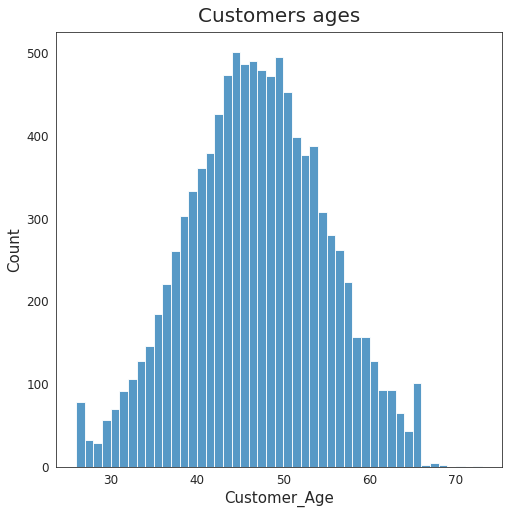

In [4]:
# Histograma
plt.figure(figsize=(8, 8))
ax = sns.histplot(df['Customer_Age'])
ax.set_title("Customers ages",
             fontsize = 20,
             pad = 10)
ax.set_xlabel("Customer_Age", size = 15)
ax.set_ylabel("Count", size = 15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

Se observa que la mayoría de los clientes tienen una edad entre los 40 y los 53 o 54 años.

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.]),
 [Text(0, 0.0, '0'),
  Text(0, 250.0, '250'),
  Text(0, 500.0, '500'),
  Text(0, 750.0, '750'),
  Text(0, 1000.0, '1000'),
  Text(0, 1250.0, '1250'),
  Text(0, 1500.0, '1500'),
  Text(0, 1750.0, '1750'),
  Text(0, 2000.0, '2000')])

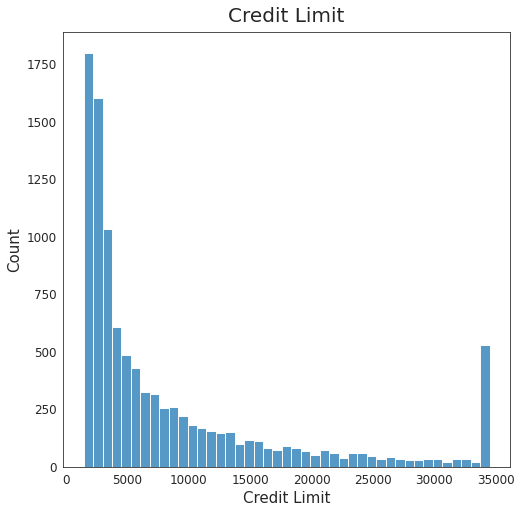

In [5]:
# Histograma
plt.figure(figsize=(8, 8))
ax = sns.histplot(df['Credit_Limit'])
ax.set_title("Credit Limit",
             fontsize = 20,
             pad = 10)
ax.set_xlabel("Credit Limit", size = 15)
ax.set_ylabel("Count", size = 15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

La mayoría de los clientes tiene un límite de crédito menor a los 10,000, sin embargo, existe un considerable número de clientes cuyo límite de crédito ronda los 35,000.

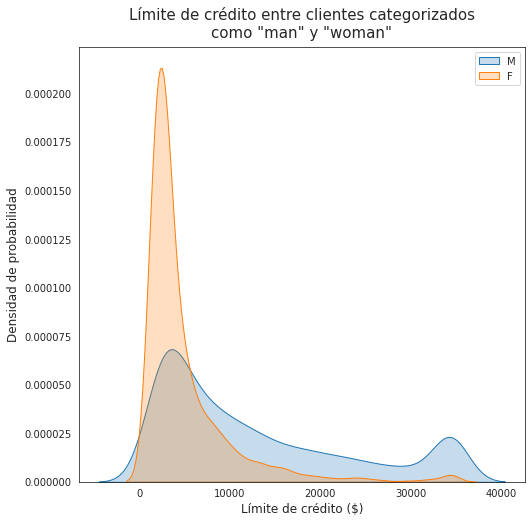

In [6]:
# Gráfica de densidad
plt.figure(figsize=(8, 8))
man = df[df['Gender'] == 'M']
woman = df[df['Gender'] == 'F']
ax = sns.kdeplot(man['Credit_Limit'], shade=True, label = 'M')
ax = sns.kdeplot(woman['Credit_Limit'], shade=True, label = 'F')
ax.set_title('Límite de crédito entre clientes categorizados\ncomo "man" y "woman"',
             fontsize = 15,
             pad = 10
             )
ax.set_ylabel('Densidad de probabilidad',
              size = 12
              )
ax.set_xlabel('Límite de crédito ($)',
              size = 12
              )
ax.legend(loc=0)

Para la mayoría de las mujeres el límite de crédito es menor a 10,000, mientras que en el caso de los hombres existe una no tan pequeña cantidad de ellos cuyo límite de crédito está entre los 30,000 y los 40,000.

**Gráficas de barras**

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 [Text(0, 0.0, '0'),
  Text(0, 500.0, '500'),
  Text(0, 1000.0, '1000'),
  Text(0, 1500.0, '1500'),
  Text(0, 2000.0, '2000'),
  Text(0, 2500.0, '2500'),
  Text(0, 3000.0, '3000'),
  Text(0, 3500.0, '3500'),
  Text(0, 4000.0, '4000')])

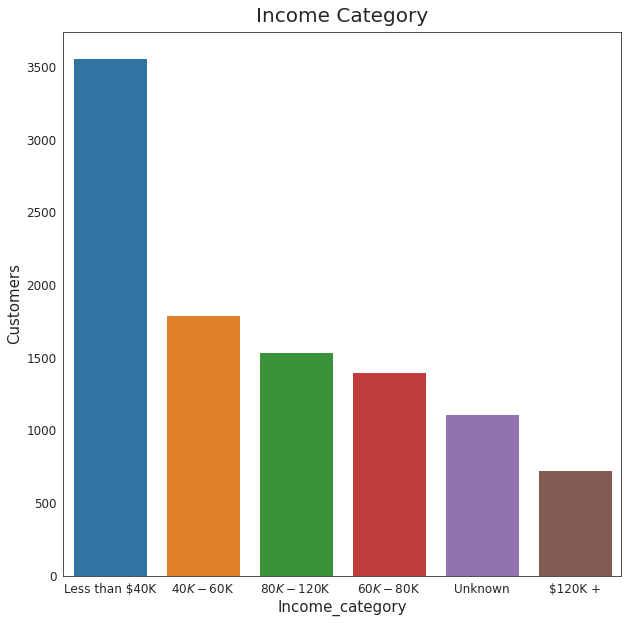

In [7]:
# Grafica de barras verticales
plt.figure(figsize=(10, 10))
income_category_counts = df['Income_Category'].value_counts()
ax = sns.barplot(x=income_category_counts.index, y=income_category_counts)
ax.set_title("Income Category",
             fontsize = 20,
             pad = 10)
ax.set_ylabel("Customers", size = 15)
ax.set_xlabel("Income_category", size = 15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

La mayoría de los clientes tienen un ingreso menor a los $40,000.

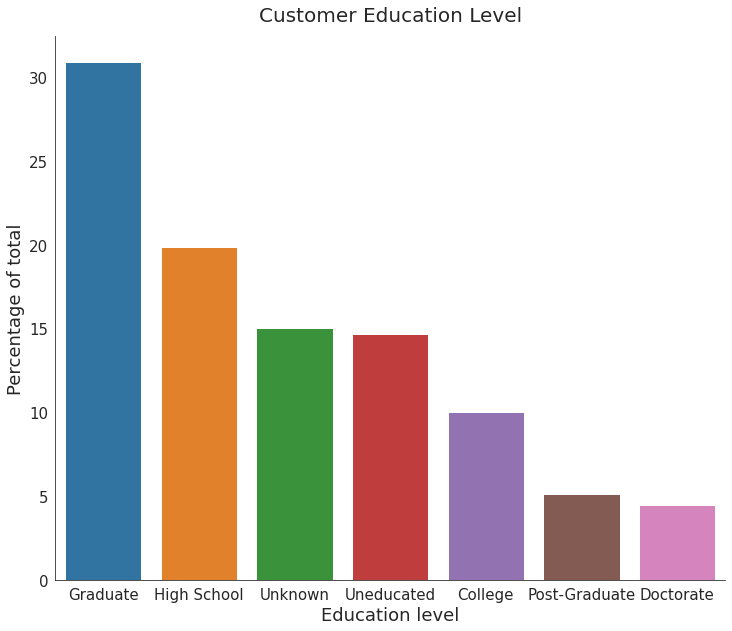

In [8]:
# Grafica de barras verticales (porcentajes)
plt.figure(figsize=(12, 10))
education_counts = df['Education_Level'].value_counts()
education_counts = education_counts * 100 / education_counts.sum()
ax = sns.barplot(x = education_counts.index, y = education_counts)

ax.set_title('Customer Education Level', fontsize=20, pad=15);
ax.set_xlabel('Education level', fontsize=18)
ax.set_ylabel('Percentage of total', fontsize=18)
ax.tick_params(axis = 'both', labelsize = 15)

sns.despine()

El nivel educativo de uno de cada tres clientes es de 'Graduate'.

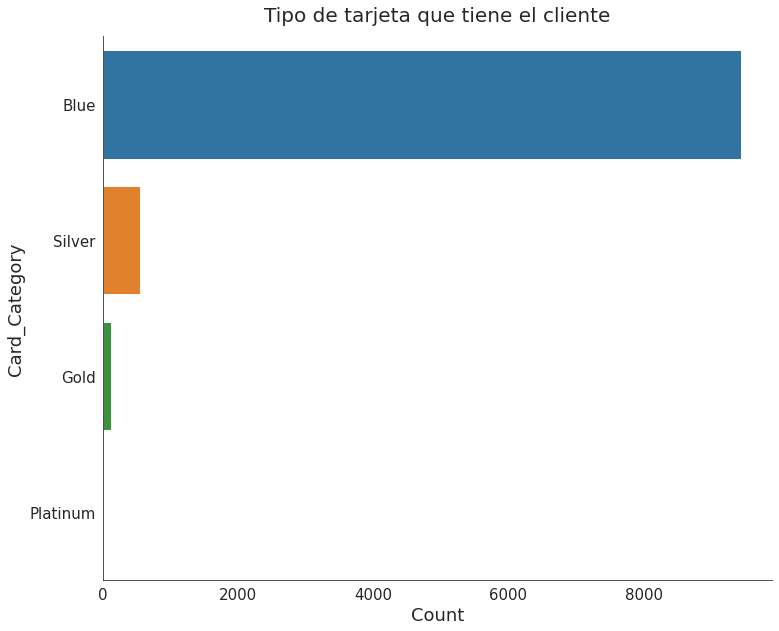

In [9]:
# Grafica de barras horizontales de `Card_Category`
plt.figure(figsize=(12, 10))
ax = sns.barplot(y = df['Card_Category'].value_counts().index,
                 x = df['Card_Category'].value_counts())

ax.set_title('Tipo de tarjeta que tiene el cliente', fontsize=20, pad=15);
ax.set_xlabel('Count', fontsize=18)
ax.set_ylabel('Card_Category', fontsize=18)
ax.tick_params(axis = 'both', labelsize = 15)

sns.despine()

La gran mayoría de los clientes poseen tarjeta 'Blue'.

**Tablas de contingencia**

In [10]:
# 1. Crear una tabla de contigencia
df_education_income = pd.crosstab(df['Education_Level'], df['Income_Category'])
df_education_income

Income_Category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown
Education_Level,,,,,,
College,70,183,132,175,345,108
Doctorate,37,70,59,57,158,70
Graduate,204,553,422,478,1139,332
High School,147,355,307,308,671,225
Post-Graduate,30,111,77,81,170,47
Uneducated,119,249,195,217,522,185
Unknown,120,269,210,219,556,145


In [11]:
# 2. Crear una tabla de contigencia

df_gender_income = pd.crosstab(df['Gender'], df['Income_Category'])
df_gender_income

Income_Category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown
Gender,,,,,,
F,0,1014,0,0,3284,1060
M,727,776,1402,1535,277,52


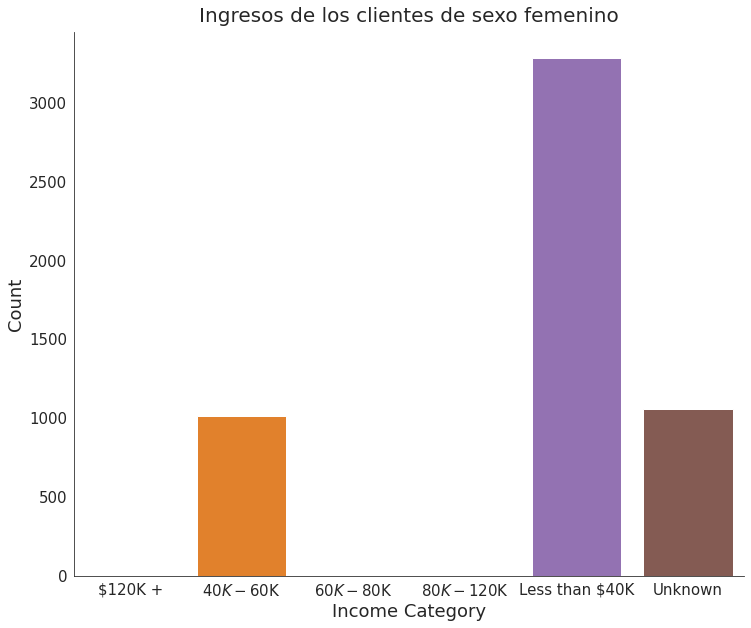

In [12]:
# 2.1 Crear una gráfica de barras
plt.figure(figsize=(12, 10))
ax = sns.barplot(x = df_gender_income.loc['F'].index,
                 y = df_gender_income.loc['F'])

ax.set_title("Ingresos de los clientes de sexo femenino", fontsize = 20, pad = 10)
ax.set_xlabel('Income Category', fontsize=18)
ax.set_ylabel('Count', fontsize=18)
ax.tick_params(axis = 'both', labelsize = 15)

sns.despine()

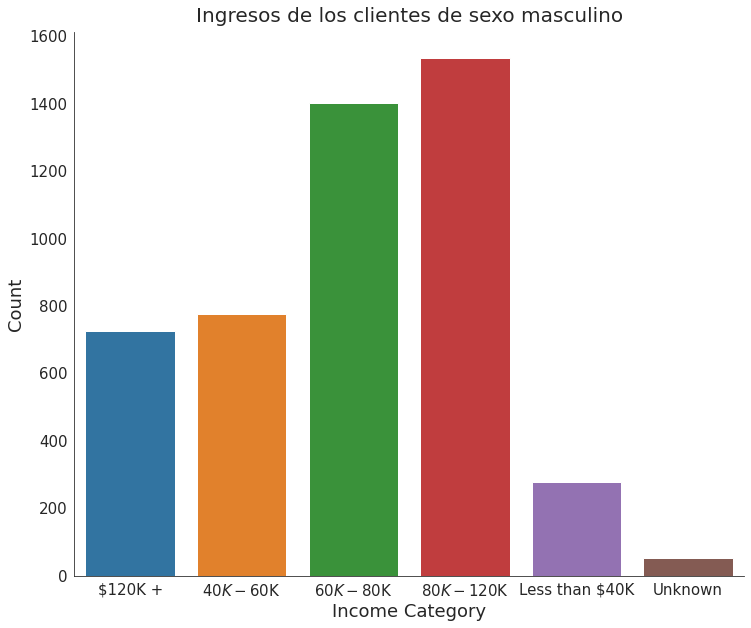

In [13]:
# 2.2 Crear una gráfica de barras
plt.figure(figsize=(12, 10))
ax = sns.barplot(x = df_gender_income.loc['M'].index,
                 y = df_gender_income.loc['M'])

ax.set_title("Ingresos de los clientes de sexo masculino", fontsize = 20, pad = 10)
ax.set_xlabel('Income Category', fontsize=18)
ax.set_ylabel('Count', fontsize=18)
ax.tick_params(axis = 'both', labelsize = 15)

sns.despine()

In [14]:
# 3. Crear crosstab con tres variables
df_gender_edlevel_income = pd.crosstab(df['Gender'], [df['Education_Level'], df['Income_Category']])
df_gender_edlevel_income

Education_Level College                                                      \
Income_Category $120K + $40K - $60K $60K - $80K $80K - $120K Less than $40K   
Gender                                                                        
F                     0         108           0            0            319   
M                    70          75         132          175             26   

Education_Level         Doctorate                                       ...  \
Income_Category Unknown   $120K + $40K - $60K $60K - $80K $80K - $120K  ...   
Gender                                                                  ...   
F                   105         0          43           0            0  ...   
M                     3        37          27          59           57  ...   

Education_Level  Uneducated                                     Unknown  \
Income_Category $60K - $80K $80K - $120K Less than $40K Unknown $120K +   
Gender                                                                    
F                         0            0            485     178       0   
M                       195          217             37       7     120   

Education_Level                                                              
Income_Category $40K - $60K $60K - $80K $80K - $120K Less than $40K Unknown  
Gender                                                                       
F                       155           0            0            517     140  
M                       114         210          219             39       5  

[2 rows x 42 columns]

In [15]:
# 3.1. Usar el metodo stack para convertie el nivel de columnas `Education_Level` en segundo nivel para el indice
df_gender_edlevel_income_stacked = df_gender_edlevel_income.stack(level=0)
df_gender_edlevel_income_stacked

Income_Category         $120K +  $40K - $60K  $60K - $80K  $80K - $120K  \
Gender Education_Level                                                    
F      College                0          108            0             0   
       Doctorate              0           43            0             0   
       Graduate               0          319            0             0   
       High School            0          195            0             0   
       Post-Graduate          0           61            0             0   
       Uneducated             0          133            0             0   
       Unknown                0          155            0             0   
M      College               70           75          132           175   
       Doctorate             37           27           59            57   
       Graduate             204          234          422           478   
       High School          147          160          307           308   
       Post-Graduate         30           50           77            81   
       Uneducated           119          116          195           217   
       Unknown              120          114          210           219   

Income_Category         Less than $40K  Unknown  
Gender Education_Level                           
F      College                     319      105  
       Doctorate                   147       67  
       Graduate                   1039      312  
       High School                 617      216  
       Post-Graduate               160       42  
       Uneducated                  485      178  
       Unknown                     517      140  
M      College                      26        3  
       Doctorate                    11        3  
       Graduate                    100       20  
       High School                  54        9  
       Post-Graduate                10        5  
       Uneducated                   37        7  
       Unknown                      39        5

In [16]:
df_gender_edlevel_income_stacked.loc[('M','Doctorate'),:]

Income_Category
$120K +           37
$40K - $60K       27
$60K - $80K       59
$80K - $120K      57
Less than $40K    11
Unknown            3
Name: (M, Doctorate), dtype: int64

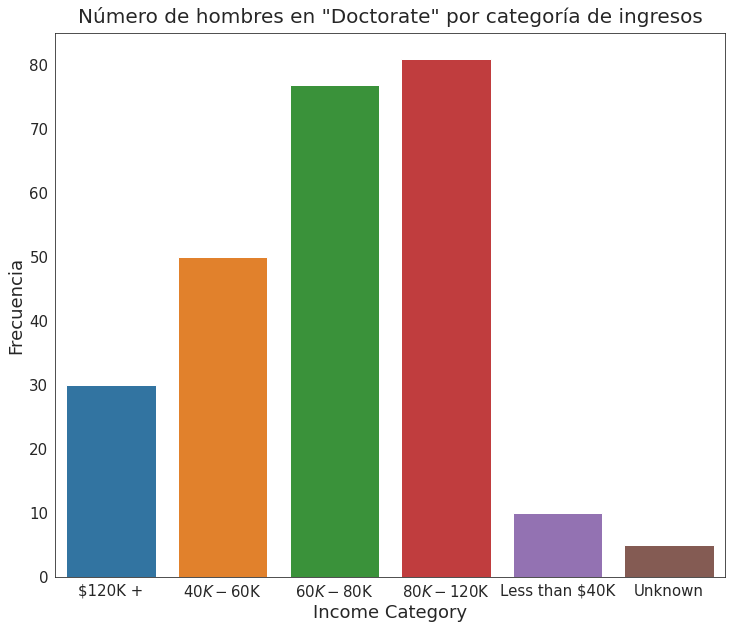

In [17]:
# 3.2 Crear gráficas de barras para el caso de 'Post-Graduate' de 'M' (Hombres)
plt.figure(figsize=(12, 10))
ax = sns.barplot(x = df_gender_edlevel_income_stacked.loc[('M', 'Doctorate')].index, y = df_gender_edlevel_income_stacked.loc[('M', 'Post-Graduate')])
ax.set_title('Número de hombres en "Doctorate" por categoría de ingresos',fontsize = 20, pad = 10)

ax.set_xlabel('Income Category', fontsize=18)
ax.set_ylabel('Frecuencia', fontsize=18)
ax.tick_params(axis = 'both', labelsize = 15)

----

In [18]:
# 5. Crear una tabla de contigencia

df_edlevel_income = pd.crosstab(df['Education_Level'], df['Income_Category'])
df_edlevel_income

Income_Category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown
Education_Level,,,,,,
College,70,183,132,175,345,108
Doctorate,37,70,59,57,158,70
Graduate,204,553,422,478,1139,332
High School,147,355,307,308,671,225
Post-Graduate,30,111,77,81,170,47
Uneducated,119,249,195,217,522,185
Unknown,120,269,210,219,556,145


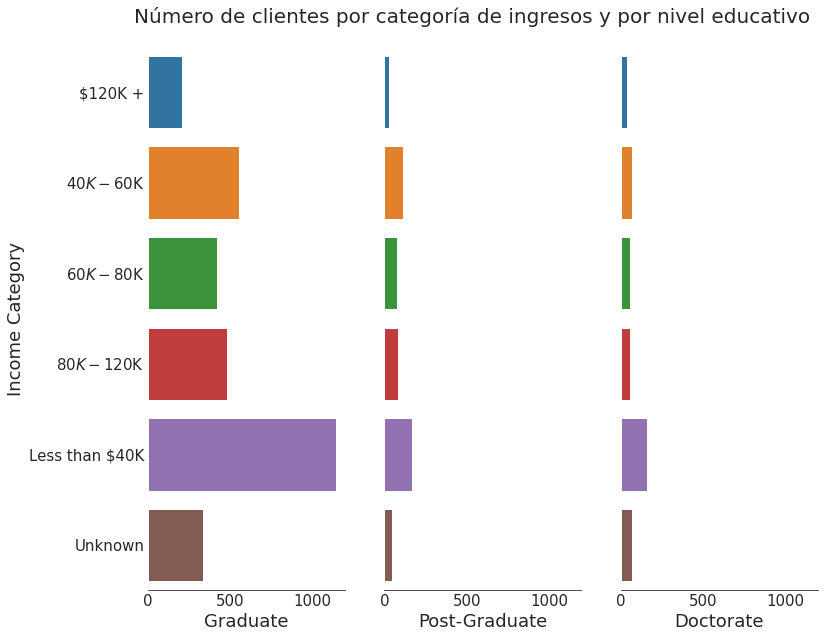

In [19]:
# Generar subplots que compartan eje x y eje y
fig, ((ax1,ax2,ax3)) = plt.subplots(nrows=1, ncols=3, figsize = (12,10), sharex=True, sharey=True)
#fig.subplots_adjust(wspace=0.9)

sns.barplot(y = df_edlevel_income.loc['Graduate'].index,
            x = df_edlevel_income.loc['Graduate'],
            ax=ax1)
sns.barplot(y = df_edlevel_income.loc['Post-Graduate'].index,
            x = df_edlevel_income.loc['Post-Graduate'],
            ax=ax2)
sns.barplot(y = df_edlevel_income.loc['Doctorate'].index,
            x = df_edlevel_income.loc['Doctorate'],
            ax=ax3)


ax1.tick_params(length = 0)
ax2.tick_params(length = 0)
ax3.tick_params(length = 0)

sns.despine(left=True, right=True, top=True, bottom=False)

ax1.set_ylabel(None)
ax2.set_ylabel(None)
ax3.set_ylabel(None)


fig.suptitle("Número de clientes por categoría de ingresos y por nivel educativo", y = 0.935, fontsize = 20)

ax1.set_xlabel('Graduate', fontsize=18)
ax2.set_xlabel('Post-Graduate', fontsize=18)
ax3.set_xlabel('Doctorate', fontsize=18)

ax1.set_ylabel('Income Category', fontsize=18)

ax1.tick_params(axis = 'both', labelsize = 15)
ax2.tick_params(axis = 'both', labelsize = 15)
ax3.tick_params(axis = 'both', labelsize = 15)

En las niveles educativos expuestos, la mayoría gana menos de 40,000, y como dato interesante, se puede observar que la mayoría de los que ganan 120,000 o más, son de nivel educativo 'Graduate'.

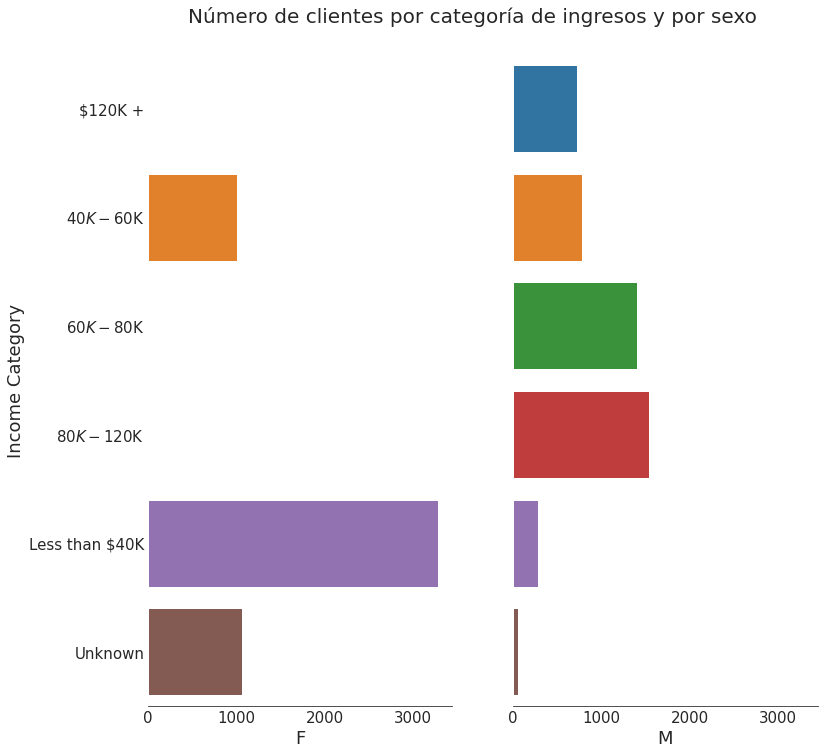

In [20]:
# 5. Generar subplots que compartan eje x y eje y
fig, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2, figsize = (12,12), sharex=True, sharey=True)
#fig.subplots_adjust(wspace=0.9)

sns.barplot(y = df_gender_income.loc['F'].index,
            x = df_gender_income.loc['F'],
            ax=ax1)
sns.barplot(y = df_gender_income.loc['M'].index,
            x = df_gender_income.loc['M'],
            ax=ax2)

ax1.tick_params(length = 0)
ax2.tick_params(length = 0)

sns.despine(left=True, right=True, top=True, bottom=False)

ax1.set_ylabel(None)
ax2.set_ylabel(None)

fig.suptitle("Número de clientes por categoría de ingresos y por sexo", y = 0.935, fontsize = 20)

ax1.set_xlabel('F', fontsize=18)
ax2.set_xlabel('M', fontsize=18)
ax1.set_ylabel('Income Category', fontsize=18)
ax1.tick_params(axis = 'both', labelsize = 15)
ax2.tick_params(axis = 'both', labelsize = 15)

En términos generales pareciera que los hombres tienden a tener mayores o mejores ingresos que las mujeres.

**Boxplots y violinplots**

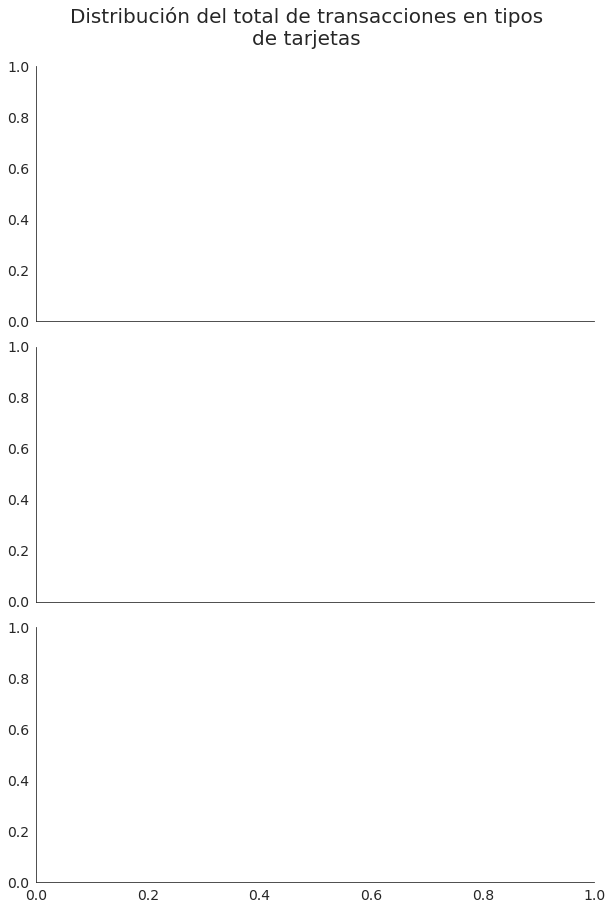

In [21]:
# Crear figura
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize = (10,15), sharex=True)
fig.subplots_adjust(hspace = 0.1)
fig.suptitle("Distribución del total de transacciones en tipos\nde tarjetas", fontsize = 20, y = 0.935)
sns.despine()


ax1.tick_params(axis = 'both', labelsize = 14)
ax2.tick_params(axis = 'both', labelsize = 14)
ax3.tick_params(axis = 'both', labelsize = 14)

In [22]:
# Crear boxplot con eje x en 'type' y y en 'price' asi como titulo y anotaciones
sns.boxplot(data = df, x = 'Total_Trans_Amt', y = 'Card_Category', ax = ax1)
ax1.set_ylabel(None)
ax1.set_xlabel(None)

Text(0.5, 584.7875, '')

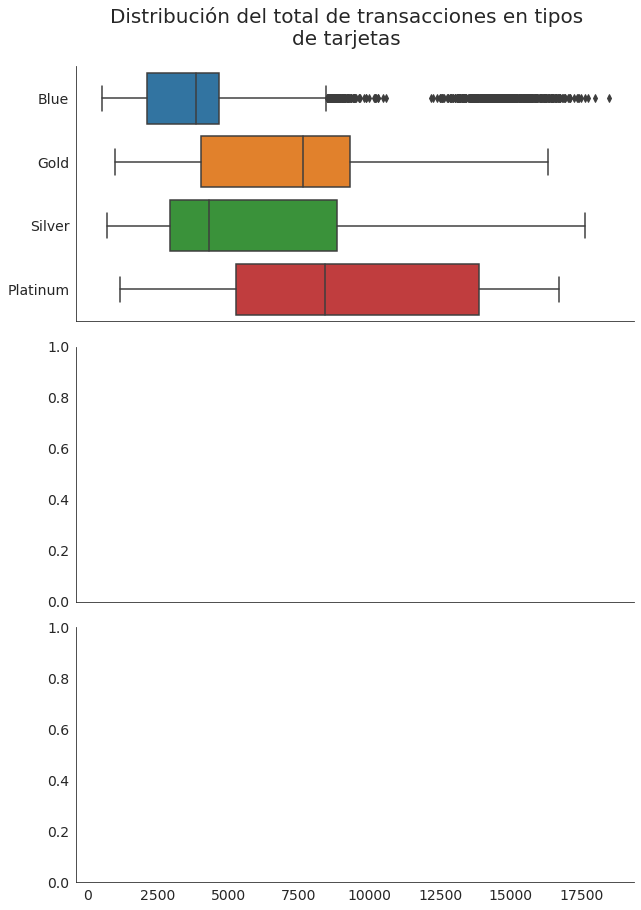

In [23]:
fig

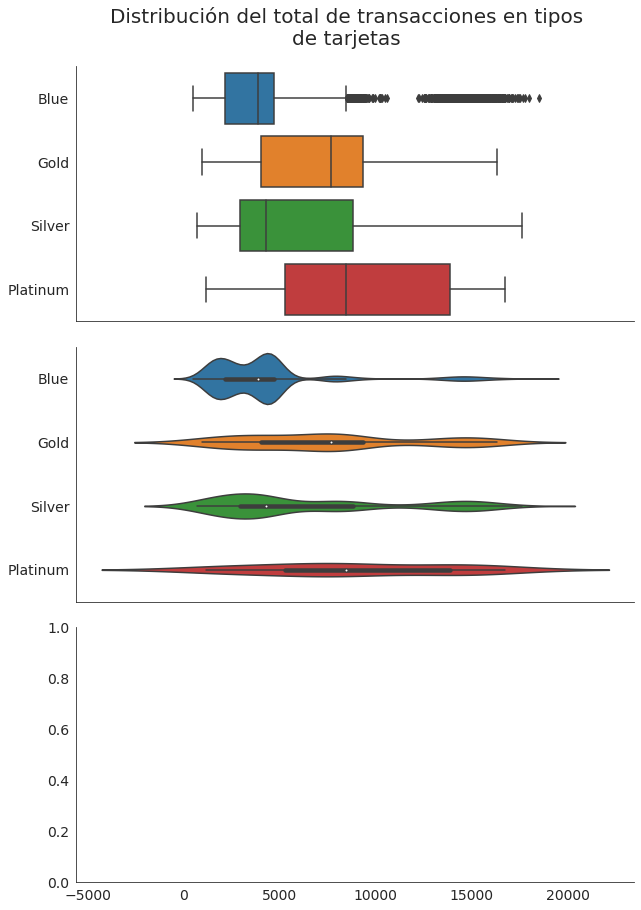

In [24]:
# Crear violin plot con mismas variables y anotar titulo y anotaciones
sns.violinplot(data = df, x = 'Total_Trans_Amt', y = 'Card_Category', ax = ax2)
ax2.set_ylabel(None)
ax2.set_xlabel(None)
fig

In [25]:
# 6. Comparar
sns.violinplot(data = df, x = 'Total_Trans_Amt', y = 'Card_Category', ax = ax3)
sns.boxplot(data = df, x = 'Total_Trans_Amt', y = 'Card_Category', ax = ax3)
ax3.set_ylabel(None)
ax3.set_xlabel(None)

Text(0.5, 3.200000000000017, '')

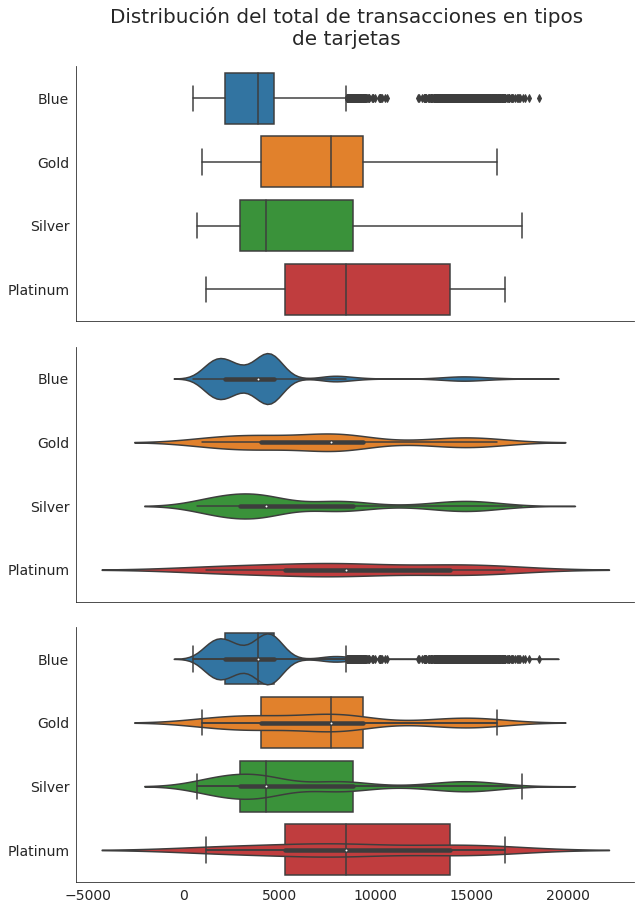

In [26]:
fig

Se observa que, a excepción de la distribución del Total de transacciones en tarjetas 'Platinum', todas las demás distribuciones son muy asimétricas (están sesgadas), y en particular para el caso de la tarjeta 'Blue' se observan muchos valores atípicos. También se observa que los mínimos y los máximos para los cuatro tipos de tarjetas tienden a ser muy similares.